# rmsc01 log exploration
Set `run_id` to the `log/` directory produced by `python abides.py -c rmsc01`. This notebook previews the files, summarizes per-strategy P&L, plots fundamentals, and inspects representative agents (ZI, HBL, Momentum, Market Maker, Exchange).

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_colwidth', None)
run_id = '1763576016'  # TODO: replace with actual log directory name
log_dir = Path('..') / 'log' / run_id
sorted(log_dir.iterdir())[:10]

[PosixPath('../log/1763576016/EXCHANGE_AGENT.bz2'),
 PosixPath('../log/1763576016/HBL_AGENT_52.bz2'),
 PosixPath('../log/1763576016/HBL_AGENT_53.bz2'),
 PosixPath('../log/1763576016/HBL_AGENT_54.bz2'),
 PosixPath('../log/1763576016/HBL_AGENT_55.bz2'),
 PosixPath('../log/1763576016/HBL_AGENT_56.bz2'),
 PosixPath('../log/1763576016/HBL_AGENT_57.bz2'),
 PosixPath('../log/1763576016/HBL_AGENT_58.bz2'),
 PosixPath('../log/1763576016/HBL_AGENT_59.bz2'),
 PosixPath('../log/1763576016/HBL_AGENT_60.bz2')]

## Summary log

In [45]:
summary = pd.read_pickle(log_dir / 'summary_log.bz2')
wide_summary = (summary
                .pivot_table(index=['AgentID', 'AgentStrategy'],
                             columns='EventType', values='Event', aggfunc='first'))
wide_summary['PNL'] = wide_summary['ENDING_CASH'] - wide_summary['STARTING_CASH']
print(wide_summary.shape)
wide_summary.reset_index().head(100)

(100, 5)


EventType,AgentID,AgentStrategy,ENDING_CASH,FINAL_CASH_POSITION,FINAL_VALUATION,STARTING_CASH,PNL
0,1,MarketMakerAgent,11891217.0,6.410150e+09,NaN,10000000.0,1891217.0
1,2,ZeroIntelligenceAgent,10405700.0,-6.959750e+07,-78800613.0,10000000.0,405700.0
2,3,ZeroIntelligenceAgent,9971400.0,-8.962960e+07,-98634420.0,10000000.0,-28600.0
3,4,ZeroIntelligenceAgent,10405600.0,-5.955800e+07,-68861118.0,10000000.0,405600.0
4,5,ZeroIntelligenceAgent,10294100.0,-8.952090e+07,-98525968.0,10000000.0,294100.0
...,...,...,...,...,...,...,...
95,96,MomentumAgent,9657620.0,-3.293110e+06,NaN,10000000.0,-342380.0
96,97,MomentumAgent,8349526.0,-4.634240e+07,NaN,10000000.0,-1650474.0
97,98,MomentumAgent,9311308.0,-1.619167e+07,NaN,10000000.0,-688692.0
98,99,MomentumAgent,8980294.0,-3.046962e+07,NaN,10000000.0,-1019706.0


### Aggregate P&L by strategy

In [46]:
wide_summary.groupby(level=1)['PNL'].describe()

,count,mean,std,min,25%,50%,75%,max
AgentStrategy,,,,,,,,
HeuristicBeliefLearningAgent,25.0,4.360498e+05,325981.164274,-1900.0,123000.00,412300.0,684048.0,1032900.0
MarketMakerAgent,1.0,1.891217e+06,NaN,1891217.0,1891217.00,1891217.0,1891217.0,1891217.0
MomentumAgent,24.0,-9.319717e+05,499876.771629,-1651752.0,-1337126.25,-936853.0,-640951.5,-168950.0
ZeroIntelligenceAgent,50.0,3.676154e+05,245335.127305,-125500.0,184511.50,417400.0,574750.0,814254.0


## Fundamental path

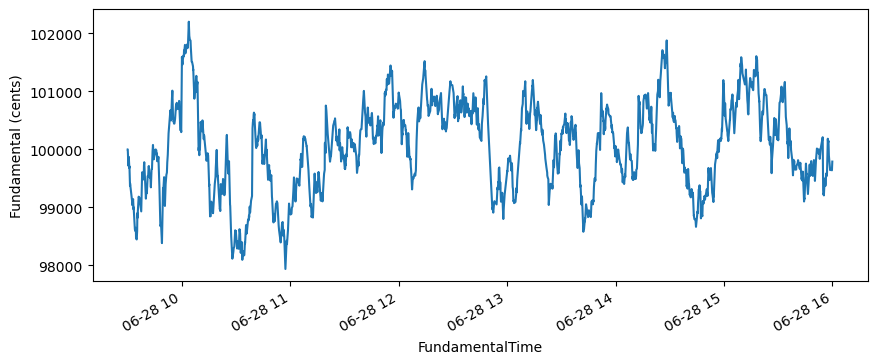

In [47]:
fundamental = pd.read_pickle(log_dir / 'fundamental_JPM.bz2').reset_index()
fundamental.plot(x='FundamentalTime', y='FundamentalValue', legend=False, figsize=(10,4))
plt.ylabel('Fundamental (cents)')
plt.show()

## Inspect specific agents

In [48]:
def load_agent_log(filename):
    return pd.read_pickle(log_dir / filename)
zi_sample = load_agent_log('ZI_AGENT_2.bz2')
print(zi_sample.shape)
zi_sample.head(40)

(109, 2)


,EventType,Event
EventTime,,
NaT,AGENT_TYPE,ZeroIntelligenceAgent
NaT,STARTING_CASH,10000000
2019-06-28 00:00:00.000000000,HOLDINGS_UPDATED,{'CASH': 10000000}
2019-06-28 09:30:00.003593974,BID_DEPTH,"[(99978, 100)]"
2019-06-28 09:30:00.003593974,ASK_DEPTH,"[(99988, 100)]"
2019-06-28 09:30:00.003593974,IMBALANCE,"[100, 100]"
2019-06-28 09:43:25.012773360,BID_DEPTH,"[(99815, 471)]"
2019-06-28 09:43:25.012773360,ASK_DEPTH,"[(99911, 471)]"
2019-06-28 09:43:25.012773360,IMBALANCE,"[471, 471]"


In [20]:
hbl_sample = load_agent_log('HBL_AGENT_53.bz2')
print(hbl_sample.shape)
hbl_sample.head(100)

(165, 2)


,EventType,Event
EventTime,,
NaT,AGENT_TYPE,HeuristicBeliefLearningAgent
NaT,STARTING_CASH,10000000
2019-06-28 00:00:00.000000000,HOLDINGS_UPDATED,{'CASH': 10000000}
2019-06-28 09:30:00.007679876,BID_DEPTH,"[(100016, 100)]"
2019-06-28 09:30:00.007679876,ASK_DEPTH,"[(100021, 100)]"
...,...,...
2019-06-28 14:25:22.446502907,ASK_DEPTH,"[(100340, 460)]"
2019-06-28 14:25:22.446502907,IMBALANCE,"[560, 460]"
2019-06-28 14:28:00.051489453,HOLDINGS_UPDATED,"{'CASH': -39158388, 'JPM': 492}"


In [37]:
momentum_sample = load_agent_log('MOMENTUM_AGENT_77.bz2')
momentum_sample[150:198]
#momentum_sample.head(100:162)

,EventType,Event
EventTime,,
2019-06-28 10:20:00.777976300,BID_DEPTH,"[(99534, 462)]"
2019-06-28 10:20:00.777976300,ASK_DEPTH,"[(99588, 362)]"
2019-06-28 10:20:00.777976300,IMBALANCE,"[462, 362]"
2019-06-28 10:21:00.793535826,BID_DEPTH,"[(99533, 552)]"
2019-06-28 10:21:00.793535826,ASK_DEPTH,"[(99589, 558)]"
2019-06-28 10:21:00.793535826,IMBALANCE,"[552, 558]"
2019-06-28 10:21:00.809095352,HOLDINGS_UPDATED,"{'CASH': 10597198, 'JPM': -6}"
2019-06-28 10:22:00.809095352,BID_DEPTH,"[(99052, 377)]"
2019-06-28 10:22:00.809095352,ASK_DEPTH,"[(99420, 304)]"


In [42]:
mm_sample[mm_sample["EventType"] == "HOLDINGS_UPDATED"]

,EventType,Event
EventTime,,
2019-06-28 00:00:00.000000000,HOLDINGS_UPDATED,{'CASH': 10000000}
2019-06-28 09:32:43.743739549,HOLDINGS_UPDATED,"{'CASH': 20002000, 'JPM': -100}"
2019-06-28 09:32:47.972990363,HOLDINGS_UPDATED,"{'CASH': 30004000, 'JPM': -200}"
2019-06-28 09:32:54.201905743,HOLDINGS_UPDATED,"{'CASH': 40006000, 'JPM': -300}"
2019-06-28 09:32:54.594812683,HOLDINGS_UPDATED,"{'CASH': 50008000, 'JPM': -400}"
...,...,...
2019-06-28 15:59:05.909914179,HOLDINGS_UPDATED,"{'CASH': 4980173015, 'JPM': -49679}"
2019-06-28 15:59:06.068019240,HOLDINGS_UPDATED,"{'CASH': 4980766079, 'JPM': -49685}"
2019-06-28 15:59:06.228139574,HOLDINGS_UPDATED,"{'CASH': 4980864923, 'JPM': -49686}"


In [52]:
#mm_sample = load_agent_log('MARKET_MAKER_AGENT_1.bz2')
mm_sample.head(30)

,EventType,Event
EventTime,,
NaT,AGENT_TYPE,MarketMakerAgent
NaT,STARTING_CASH,10000000
2019-06-28 00:00:00.000000000,HOLDINGS_UPDATED,{'CASH': 10000000}
2019-06-28 09:30:01.011668284,BID_DEPTH,"[(100003, 100), (99990, 100), (99985, 100), (99984, 100), (99980, 300)]"
2019-06-28 09:30:01.011668284,ASK_DEPTH,"[(100004, 200), (100016, 100), (100018, 100), (100023, 100), (100025, 100)]"
2019-06-28 09:30:01.011668284,IMBALANCE,"[700, 600]"
2019-06-28 09:30:01.011668284,ORDER_SUBMITTED,"{'agent_id': 1, 'time_placed': '2019-06-28T09:30:01.011668284', 'symbol': 'JPM', 'quantity': 334, 'is_buy_order': True, 'order_id': 72, 'fill_price': None, 'tag': None, 'limit_price': 100003}"
2019-06-28 09:30:01.011668284,ORDER_SUBMITTED,"{'agent_id': 1, 'time_placed': '2019-06-28T09:30:01.011668284', 'symbol': 'JPM', 'quantity': 334, 'is_buy_order': False, 'order_id': 73, 'fill_price': None, 'tag': None, 'limit_price': 100003}"
2019-06-28 09:30:01.011668284,ORDER_SUBMITTED,"{'agent_id': 1, 'time_placed': '2019-06-28T09:30:01.011668284', 'symbol': 'JPM', 'quantity': 317, 'is_buy_order': True, 'order_id': 74, 'fill_price': None, 'tag': None, 'limit_price': 100002}"


In [ ]:
exchange = load_agent_log('ExchangeAgent0.bz2')
exchange.head(20)